## In this final project, I will be analyzing Credit Card approval. The file used in the analysis was obtained from Kaggle, https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction. The file is made up of two files, with a common client ID; they are application_record.csv and credit_record.csv. 
## The feature explanation for both files are as follows:
### Application_record
#### Feature                  Explanation
##### ID:                      Client number
##### CODE_GENDER:             Gender
##### FLAG_OWN_CAR:            Is there a car
##### FLAG_OWN_REALTY:         Is there a property
##### CNT_CHILDREN:            Number of children
##### AMT_INCOME_TOTAL:        Annual Income
##### NAME_INCOME_TYPE:        Income category
##### NAME_EDUCATION_TYPE:     Education level
##### NAME_FAMILY_STATUS:      Marital status
##### NAME_HOUSING_TYPE:       Way of living
##### DAYS_BIRTH:              Birthday
##### DAYS_EMPLOYED:           Start date of employment (positive number means unemployed)
##### FLAG_MOBIL:              Is there a mobile phone
##### FLAG_WORK_PHONE:         Is there a work phone
##### FLAG_PHONE:              Is there a phone
##### FLAG_EMAIL:              Is there an email
##### OCCUPATION_TYPE:         Occupation
##### CNT_FAM_MEMBER:          Family size

### Credit_record
#### Feature                  Explanation
##### ID:                      Client number
##### MONTHS_BALANCE:          Record month (month of starting point, backwards, 0 is current month, -1 is the previous month)
##### STATUS:                  Status (number of date past due)

## In this project, I will be analyzing the data using different machine learning models to determine which ML model gives the 
## the best data result analysis. Each analysis will have its own section and will be labeled accordingly.

# DATA INQUIRY AND CLEANING

In [84]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error as mae, mean_squared_error as mse, roc_auc_score as ras
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
# import data
credit_df = pd.read_csv("credit_record.csv")
application_df = pd.read_csv("application_record.csv")

In [8]:
# Merge both files and display first five rows
df = application_df.merge(credit_df, how='inner', on=['ID'])
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


#### From the above, the data contains features with both numeric and categorical data. Next, I will perform some data analysis to determine the contents of the data, make modifications before applying any ML models to the data.

In [9]:
# Create copy of dataframe
ccdata_df = df.copy()

# Describe data
ccdata_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [10]:
# Data Info
ccdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

### From the above, there are 777,715 entries with Occupation_type having 537,667 which may signify the presence of missing values. In addition, the data consists of two files that are merged together, therefore, there may be the presence of duplicate values. If there are duplicates and missing values, then it will be removed to ensure accuracy in the final results.

In [11]:
# Index the ID column
ccdata_df.index = ccdata_df['ID']
ccdata_df.drop('ID', inplace= True, axis=1)

# Drop duplicated
ccdata_df.drop_duplicates(inplace=True)

In [12]:
# View revised data
ccdata_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
ID,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [13]:
# Describe data
ccdata_df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,468925.000000,4.689250e+05,468925.000000,468925.000000,468925.0,468925.000000,468925.000000,468925.000000,468925.000000,468925.000000
mean,0.421415,1.858502e+05,-16158.295521,60224.031389,1.0,0.225379,0.297472,0.089230,2.197081,-20.979513
std,0.747775,1.009916e+05,4130.224148,138588.126971,0.0,0.417832,0.457146,0.285075,0.910155,14.680523
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19584.000000,-3246.000000,1.0,0.000000,0.000000,0.000000,2.000000,-32.000000
50%,0.000000,1.575000e+05,-15812.000000,-1610.000000,1.0,0.000000,0.000000,0.000000,2.000000,-19.000000
75%,1.000000,2.250000e+05,-12724.000000,-398.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [14]:
# Data Information
ccdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468925 entries, 5008804 to 5150337
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          468925 non-null  object 
 1   FLAG_OWN_CAR         468925 non-null  object 
 2   FLAG_OWN_REALTY      468925 non-null  object 
 3   CNT_CHILDREN         468925 non-null  int64  
 4   AMT_INCOME_TOTAL     468925 non-null  float64
 5   NAME_INCOME_TYPE     468925 non-null  object 
 6   NAME_EDUCATION_TYPE  468925 non-null  object 
 7   NAME_FAMILY_STATUS   468925 non-null  object 
 8   NAME_HOUSING_TYPE    468925 non-null  object 
 9   DAYS_BIRTH           468925 non-null  int64  
 10  DAYS_EMPLOYED        468925 non-null  int64  
 11  FLAG_MOBIL           468925 non-null  int64  
 12  FLAG_WORK_PHONE      468925 non-null  int64  
 13  FLAG_PHONE           468925 non-null  int64  
 14  FLAG_EMAIL           468925 non-null  int64  
 15  OCCUPATION

#### From the above, the data set now has 468,925 entries, with Occupation_Type having fewer entries.

In [15]:
# Check for unique entries in the data set
for x in ccdata_df.columns:
    print(x, '-', ccdata_df[x].unique())

CODE_GENDER - ['M' 'F']
FLAG_OWN_CAR - ['Y' 'N']
FLAG_OWN_REALTY - ['Y' 'N']
CNT_CHILDREN - [ 0  1  3  2  4  5 14 19  7]
AMT_INCOME_TOTAL - [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   184500.   103500.   162000.   165150.    54000.
  243000.   256500.    33300.   697500.   101250.    58500.   110250.
  472500.   196650.   630000.   432000.   257625.   143100.   207000.
  288000.   131400. 

In [16]:
# Change 'C' and 'X' in to numeric values
ccdata_df['STATUS'].replace({'C' : 6, 'X': 7}, inplace=True)
ccdata_df['STATUS']=ccdata_df['STATUS'].astype(int)

In [17]:
# Create a label for STATUS to determine which individuals can be classified as risky
def get_label(status):
    if status in (2, 3, 4, 5):
        return 1 # risky individual
    else:
        return 0 # not risky

In [18]:
# Apply label to STATUS column
ccdata_df['LABEL'] = ccdata_df['STATUS']. apply(get_label)
ccdata_df['LABEL'] = ccdata_df['LABEL'].astype('category')
ccdata_df.drop('STATUS', inplace=True, axis = 1)

ccdata_df.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,LABEL
ID,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,0
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,0
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,0
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,0
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-5,0
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-6,0
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-7,0
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-8,0


#### Since 'STATUS' and 'LABEL' columns refer to the same values, risk or no risk, drop the 'STATUS' column

### From the above table we see that there are null (NaN) values present in the data. Next is to find our how many are present and determine the replacement values.

In [19]:
# Check for null values in the dataset.
ccdata_df.isnull().sum()

CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        144806
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
LABEL                       0
dtype: int64

In [20]:
# Analyzing Occupation column
# Determine the count of each occupation in the data
ccdata_df.OCCUPATION_TYPE.value_counts()

Laborers                 80166
Core staff               44669
Sales staff              42603
Managers                 40320
Drivers                  30149
High skill tech staff    18757
Medicine staff           15757
Accountants              15527
Cooking staff             8445
Security staff            8238
Cleaning staff            6997
Private service staff     3928
Low-skill Laborers        2232
Secretaries               2030
Waiters/barmen staff      1695
HR staff                  1181
IT staff                   762
Realty agents              663
Name: OCCUPATION_TYPE, dtype: int64

### From the above, we can assume that the missing values are for those who are unemployed. Therefore, null values in the dataset will be reclassified as 'Unemployed'

In [21]:
# replace null values in Occupation_type column with Unemployed
ccdata_df.OCCUPATION_TYPE.replace(np.nan, 'Unemployed', inplace=True)

# Display updated Occupation_type
ccdata_df.OCCUPATION_TYPE.value_counts()

Unemployed               144806
Laborers                  80166
Core staff                44669
Sales staff               42603
Managers                  40320
Drivers                   30149
High skill tech staff     18757
Medicine staff            15757
Accountants               15527
Cooking staff              8445
Security staff             8238
Cleaning staff             6997
Private service staff      3928
Low-skill Laborers         2232
Secretaries                2030
Waiters/barmen staff       1695
HR staff                   1181
IT staff                    762
Realty agents               663
Name: OCCUPATION_TYPE, dtype: int64

# DATA ANALYSIS SECTION

Text(0.5, 1.0, 'Label Plot for Credit Card Risk')

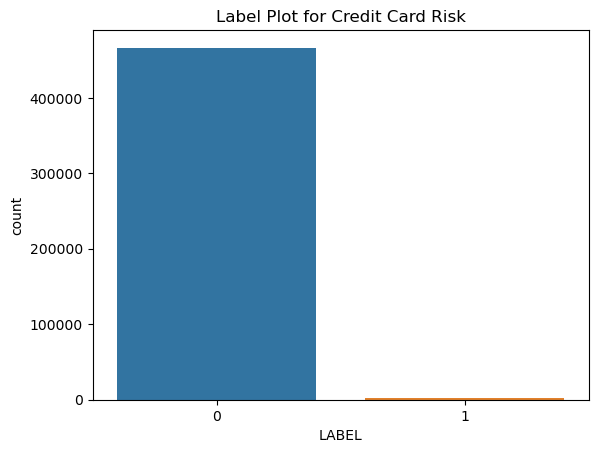

In [22]:
# Graphical display of label column
sns.countplot(x=ccdata_df['LABEL'])
plt.title("Label Plot for Credit Card Risk")

### Plot shows that data is skewed toward credit card approval. 

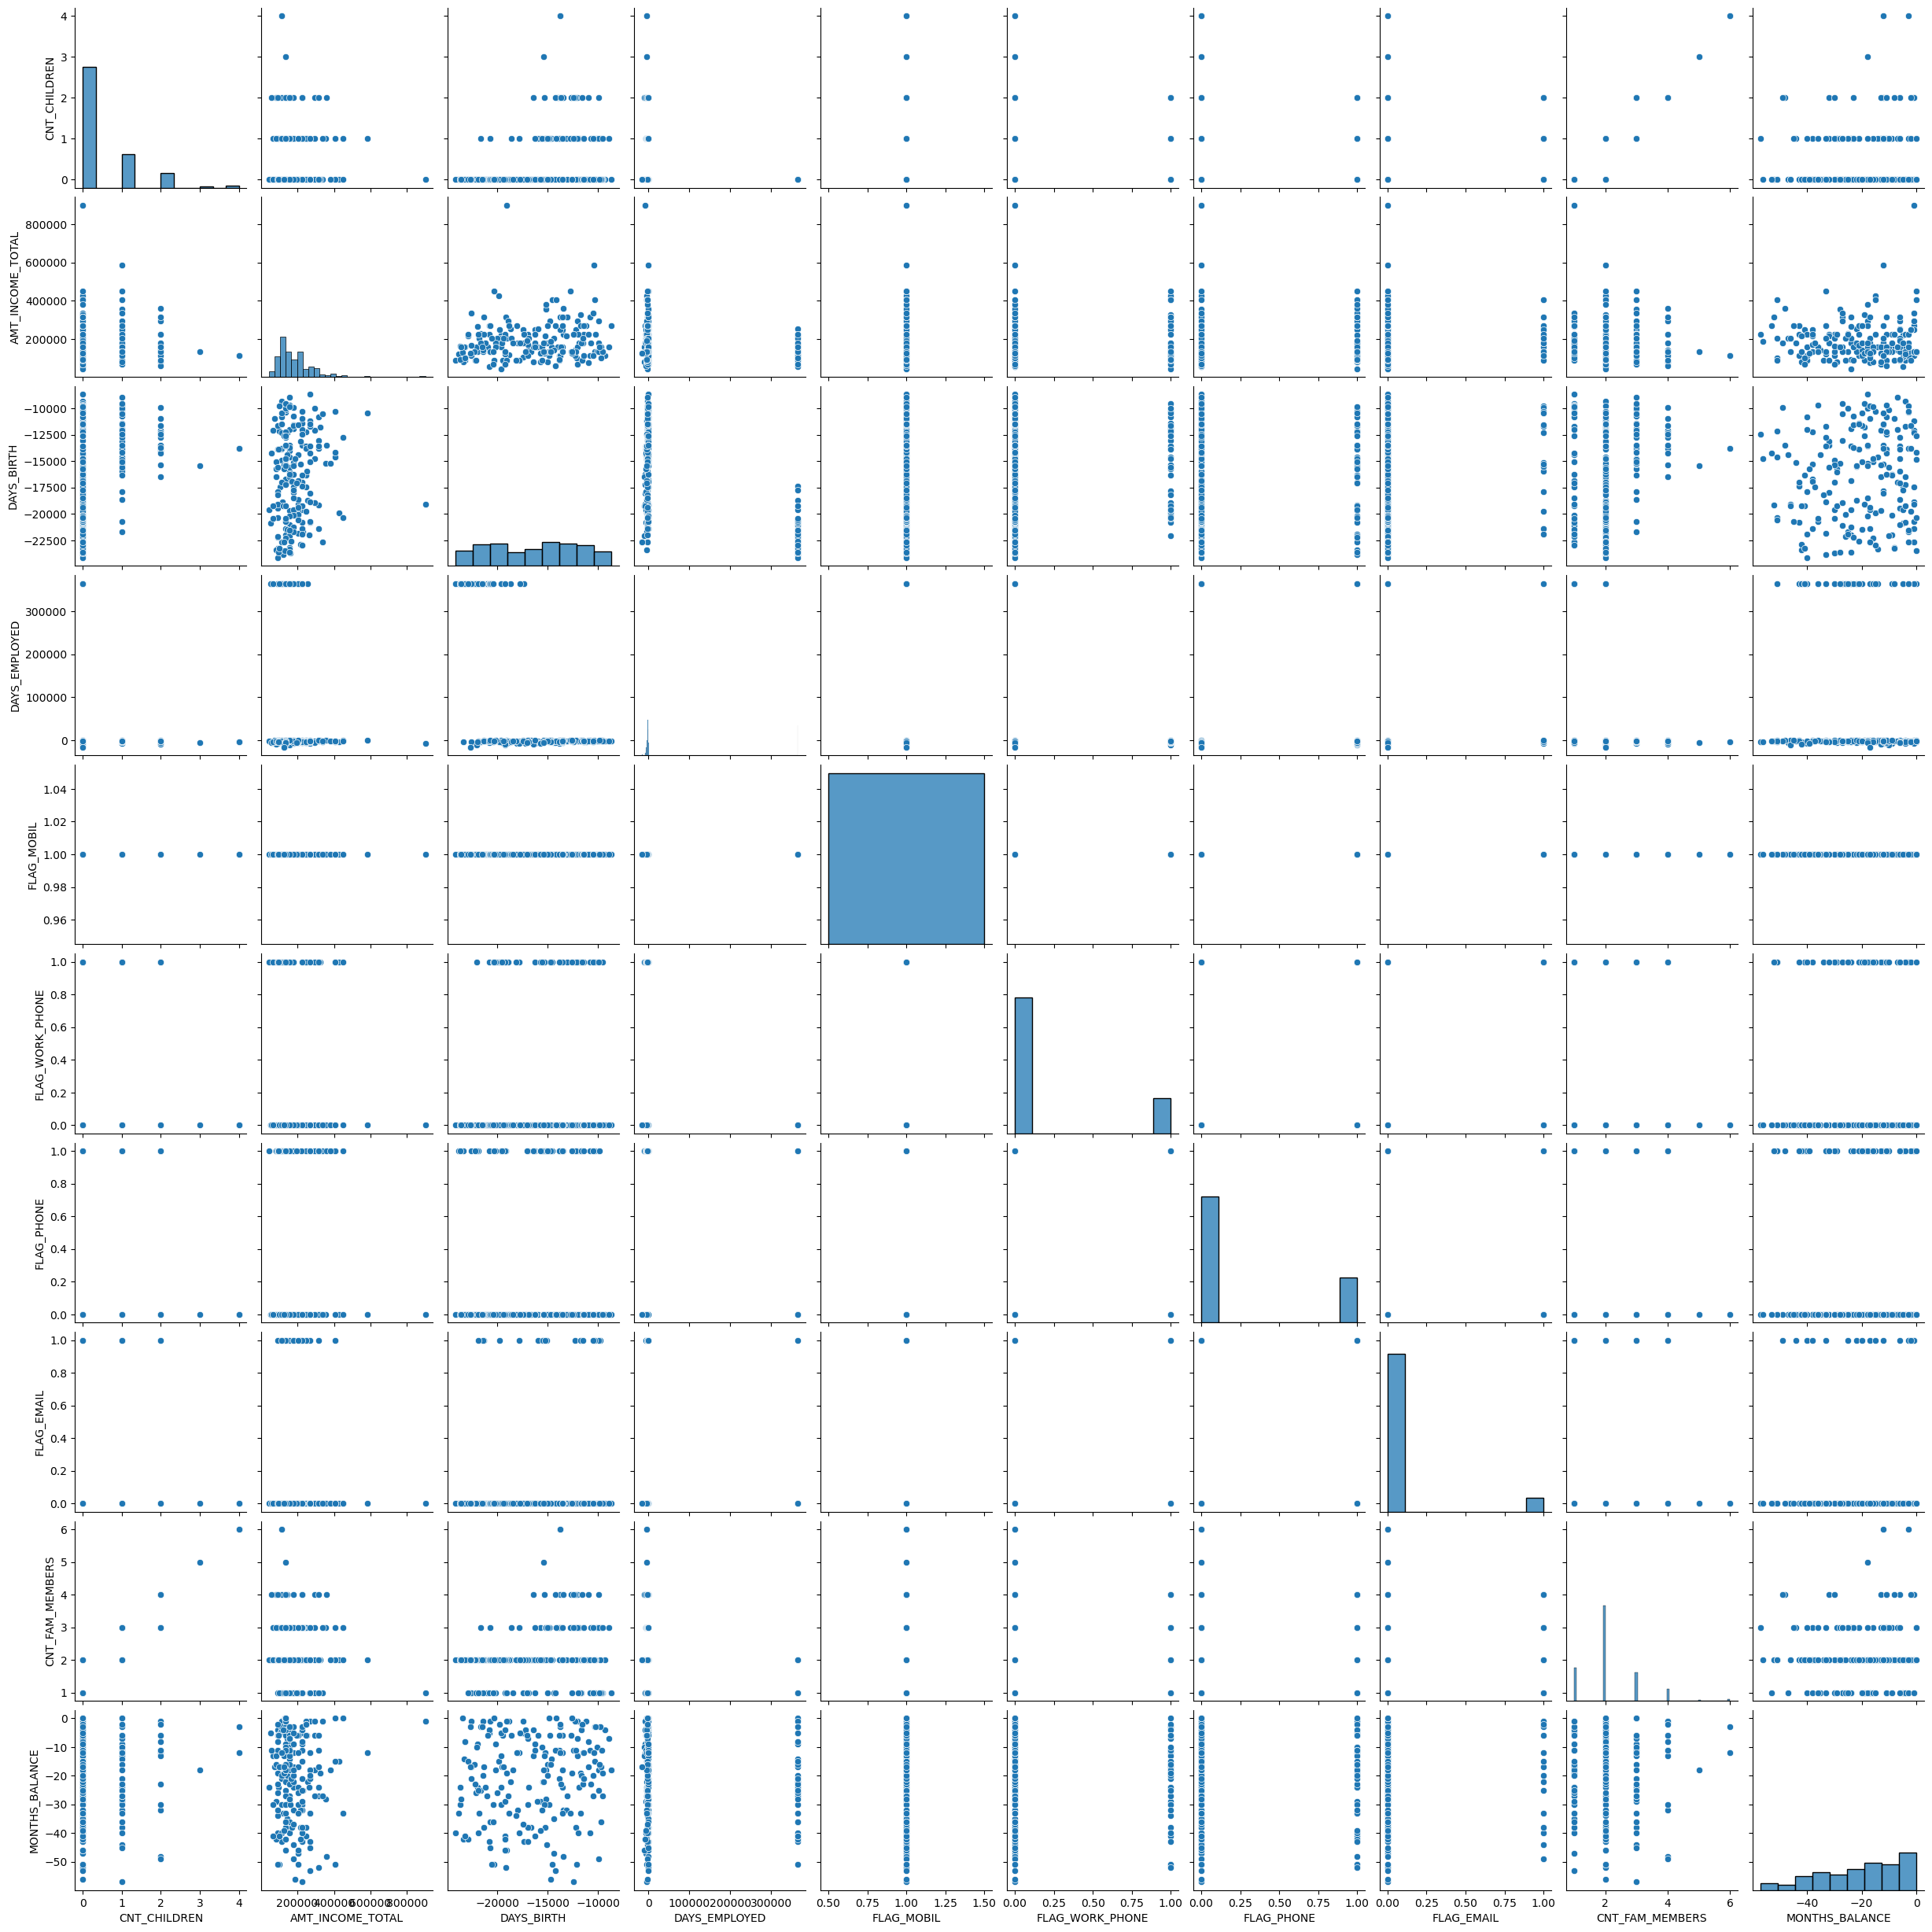

In [23]:
# Graphical plot to determine relations between data using seaborn. 
# Since data set has 468,925 data points, it'll be time-consuming to plot each point, therefore, a subset of the values will be used 
# in data analysis
# In this sample data, 200 data points will be used

sns.pairplot(ccdata_df.sample(200))

### Determine the correlation between some of the variables to 'LABEL' column. 'LABEL' column has 0 or 1 risk associated with the individual's credit card approval, with 0 being 'Good' and 1 'Bad'

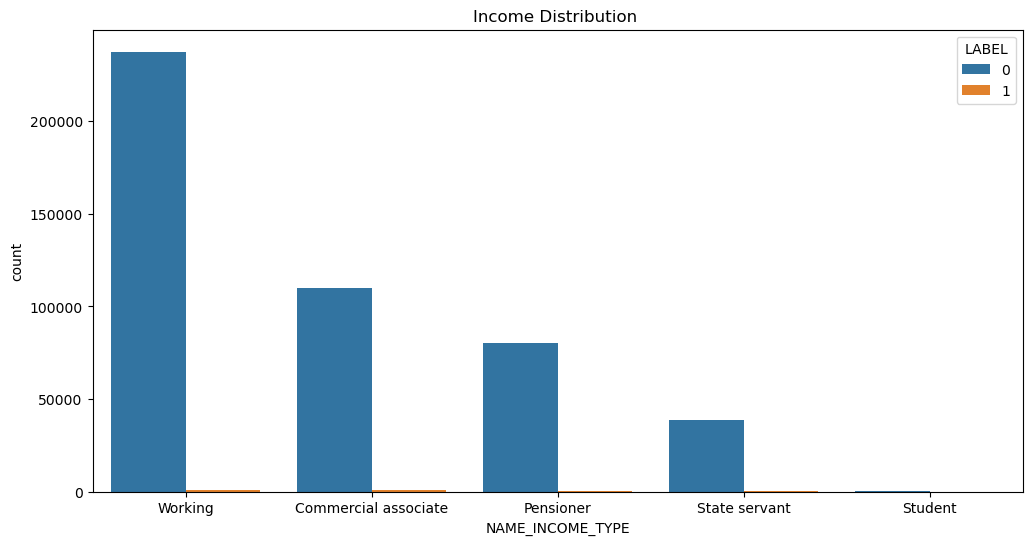

In [24]:
# Determine the relation between Income and Credit card approval risk.
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_INCOME_TYPE', data=ccdata_df,  hue='LABEL')
plt.title("Income Distribution ")
plt.show()

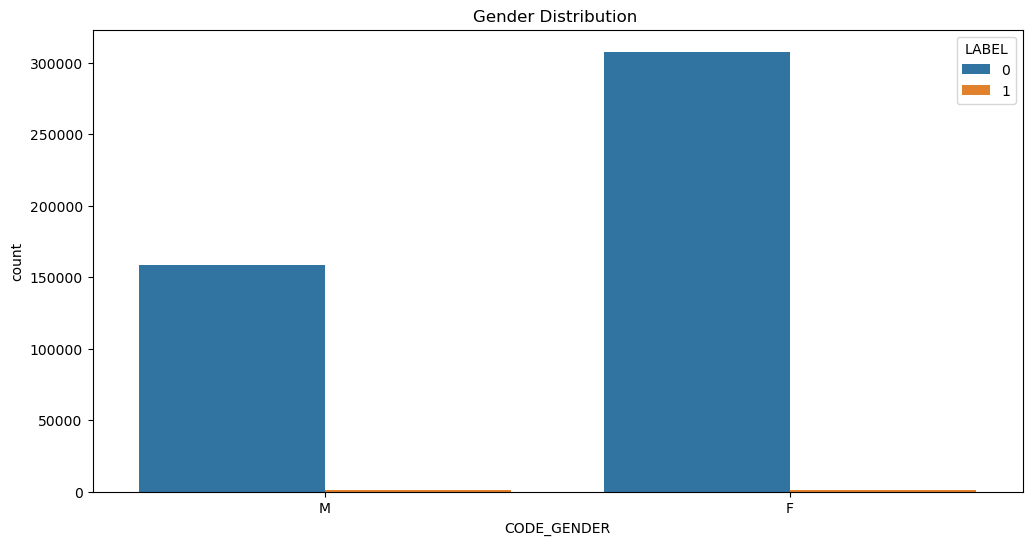

In [25]:
#Determine relation between Gender and Credit risk
plt.figure(figsize=(12,6))
sns.countplot(x='CODE_GENDER', data=ccdata_df,  hue='LABEL')
plt.title("Gender Distribution ")
plt.show()

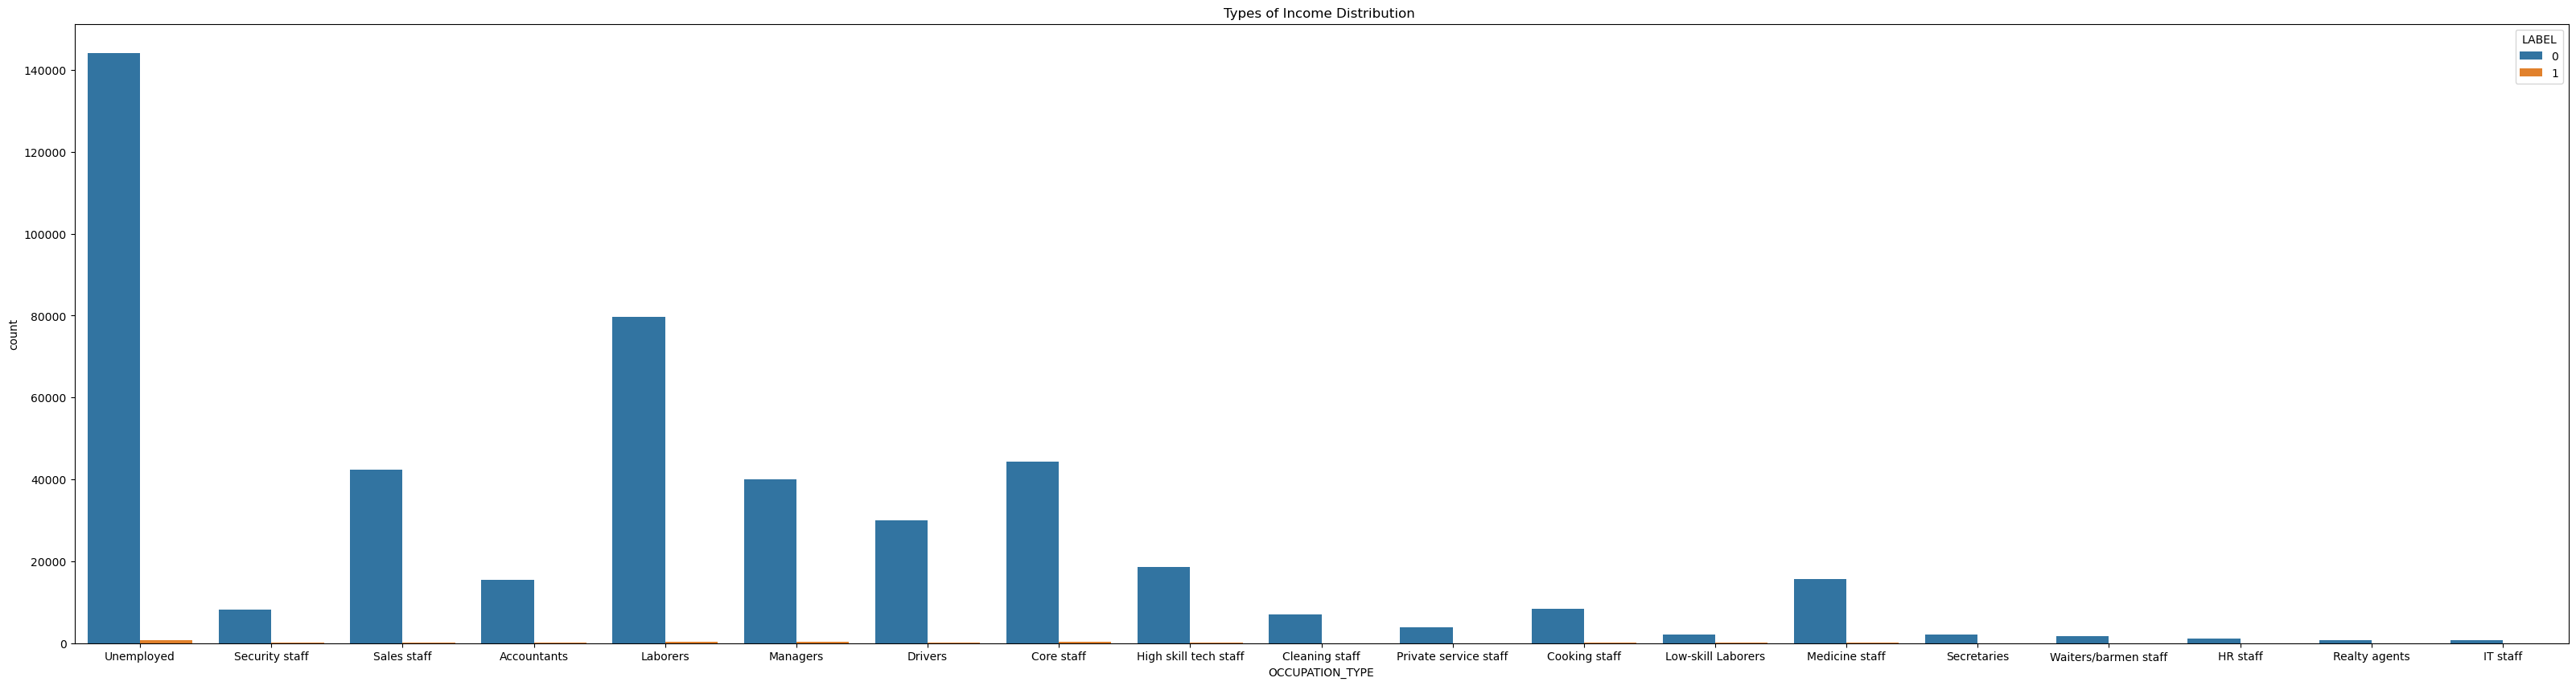

In [26]:
# Distribution of Occupation Type
plt.figure(figsize=(40,10))
sns.countplot(x='OCCUPATION_TYPE', data=ccdata_df,  hue='LABEL')
plt.title("Types of Income Distribution ")
plt.show()

# DATA MODELING SECTION

#### Even though some columns such as having an email, mobile phone, owning a car are categorical columns, it is important to include those features to obtain a more accurate result for the machine learning models. Therefore, all categorical columns will be converted into numerical vaules to allow for data modeling

In [27]:
# Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()

# Loop through 'object' columns and convert it to numeric
for col in ccdata_df.columns:
    if ccdata_df[col].dtype == 'object':
        ccdata_df[col]=le.fit_transform(ccdata_df[col])

In [28]:
# Feature selection
# Separate into Train and test data sets
X=ccdata_df.drop(['LABEL'], axis=1) # features
y = ccdata_df.LABEL # target 

In [29]:
# Split into 80-20 train-test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=100)

In [30]:
# Scale train and test data set variables
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [31]:
# Determine data shape for train and test data set
print("Training data shape: ", X_train_std.shape, y_train.shape)
print("Test data shape: ", X_test_std.shape, y_test.shape)

Training data shape:  (93785, 18) (93785,)
Test data shape:  (375140, 18) (375140,)


## Analyze data set with different machine learning models

### Logistic Regression

In [32]:
# import Logistic Regression library
from sklearn.linear_model import LogisticRegression

In [33]:
# Logistic Regression Analysis
lr = LogisticRegression(random_state=100)
lr.fit(X_train_std, y_train)

# Accuracy
print("Accuracy score for Training Data: ", lr.score(X_train_std, y_train))
print("Accuracy score for Test Data: ", lr.score(X_test_std,  y_test))

Accuracy score for Training Data:  0.9947432958362211
Accuracy score for Test Data:  0.9945220451031614


In [34]:
# Classification Matrix
y_pred = lr.predict(X_test_std)

# Build Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
print(classification_report(y_test, y_pred))

c:\Users\chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    373085
           1       0.00      0.00      0.00      2055

    accuracy                           0.99    375140
   macro avg       0.50      0.50      0.50    375140
weighted avg       0.99      0.99      0.99    375140



c:\Users\chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Metrics R-square, MAE, MSE, AUC_ROC scores
print("R-square score: ", r2_score(y_test, y_pred))
print("Mean Square Error Score(MSE): ", mse(y_test, y_pred))
print("Mean Absolute Error score(MAE): ", mae(y_test, y_pred))
print("AUC-ROC score(AUC-ROC) : ", ras(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

R-square score:  -0.005508128174545268
Mean Square Error Score(MSE):  0.005477954896838513
Mean Absolute Error score(MAE):  0.005477954896838513
AUC-ROC score(AUC-ROC) :  0.5
Accuracy Score:  0.9945220451031614


### Metrics results shows that the data accuracy is high and low MSE and MAE scores illustrates that the accuracy of the feature variables is high. This means that each feature variable can be used to assess risk for credit card approval. Even though R-square is low, other metrics can be used to make predictions. 

# K-Nearest Neighbor Analysis

In [43]:
# import libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

In [72]:
knn = KNeighborsRegressor()
hyperparameters = {'n_neighbors' : randint(low=3, high = 20), 'weights': ['uniform', 'distance'], 'p':[1,2]}
hyperparameters_grid = {'n_neighbors' : [3,5,7], 'weights': ['uniform', 'distance'], 'p':[1,2]}

In [73]:
# Grid Search Analysis
gs = GridSearchCV(knn, hyperparameters_grid, scoring='neg_mean_absolute_error', n_jobs=-1)
gs.fit(X.sample(200), y.sample(200))

# Result
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

KNeighborsRegressor(n_neighbors=7, p=1)
{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
-0.02214285714285714


In [74]:
# Classification matrix for Grid search
gs_pred = gs.predict(X_test_std)

# Classification Report
print(classification_report(y_test, gs_pred))

c:\Users\chidi\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    373085
           1       0.00      0.00      0.00      2055

    accuracy                           0.99    375140
   macro avg       0.50      0.50      0.50    375140
weighted avg       0.99      0.99      0.99    375140



c:\Users\chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
# Random Search Analysis
rs = RandomizedSearchCV(knn, hyperparameters, scoring= 'neg_mean_absolute_error', n_jobs=-1, random_state=100)
rs.fit(X.sample(200), y.sample(200))

# Result
print(rs.best_estimator_)
print(rs.best_params_)
print(rs.best_score_)

KNeighborsRegressor(n_neighbors=19, p=1)
{'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}
-0.022368421052631576


In [79]:
# Classification Report
rs_pred = rs.predict(X_test_std)

# Classification Report
print(classification_report(y_test, rs_pred))

c:\Users\chidi\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    373085
           1       0.00      0.00      0.00      2055

    accuracy                           0.99    375140
   macro avg       0.50      0.50      0.50    375140
weighted avg       0.99      0.99      0.99    375140



c:\Users\chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Since only a sample of the data is used, the results obtained show that our random search resulted in a better mean absolute error when compared to grid search. However, the results obtained may be different if the entire data set was used and some features are dropped. In general, the results obtained can be used to infer that the risk of an individual for a credit card application can be determined using all features in the data set. The classification report is similar to logistic regression model, since only a sample data was used further analysis has to be performed to ensure the above classification report is consistent 

# Tree-Based ML models
## Random Forest

In [80]:
# import libraries
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Analysis
rfc = RandomForestClassifier(n_estimators=20, max_depth=10, n_jobs=-1, random_state=100)
rfc.fit(X_train_std, y_train)

# Accuracy Score
print("Accuracy Train data: ", rfc.score(X_train_std, y_train))
print("Accuracy Test data",rfc.score(X_test_std, y_test))

Accuracy Train data:  0.9952017913312363
Accuracy Test data 0.9946020152476409


#### Accuracy score for both train and test data sets are same, meaning that there is no overfitting or underfitting of the data. Score is similar to results obtained from Logistic Regression analysis

## XGBoost Analysis

In [82]:
# import library
import xgboost as xgb

In [83]:
# Analysis
xgb_model = xgb.XGBClassifier()
fit_model =xgb_model.fit(X_train_std, y_train)
fit_pred = xgb_model.fit(X_test_std, y_test)

# Accuracy score
print("Accuracy Train data: ",fit_model.score(X_train_std, y_train))
print("Accuracy Test data: ", fit_pred.score(X_test_std, y_test))

Accuracy Train data:  0.995468358479501
Accuracy Test data:  0.9956256330969772


#### Accuracy score for both train and test data sets are the same.

### In conclusion, based on the various machine learning models used, K-Nearest Neighbors(KNN) may not be the best model to analyze the data. Since only a subset of the data was used, the results obtained may not reflect the best results. In addition, additional analysis for KNN may involve dropping irrelevant data features such as email, phone and repeat the process to note of any improvement in the data sets. Also, standardizing the features may yield better result as can seen from the accuracy score obtained in the classification report for both types of searches. For this project KNeighborRegressor, KNeighborClassifier may yield better result, since the data set may run better with a classifier rather than a regressor. 